In [26]:
!pip install chromadb
!pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


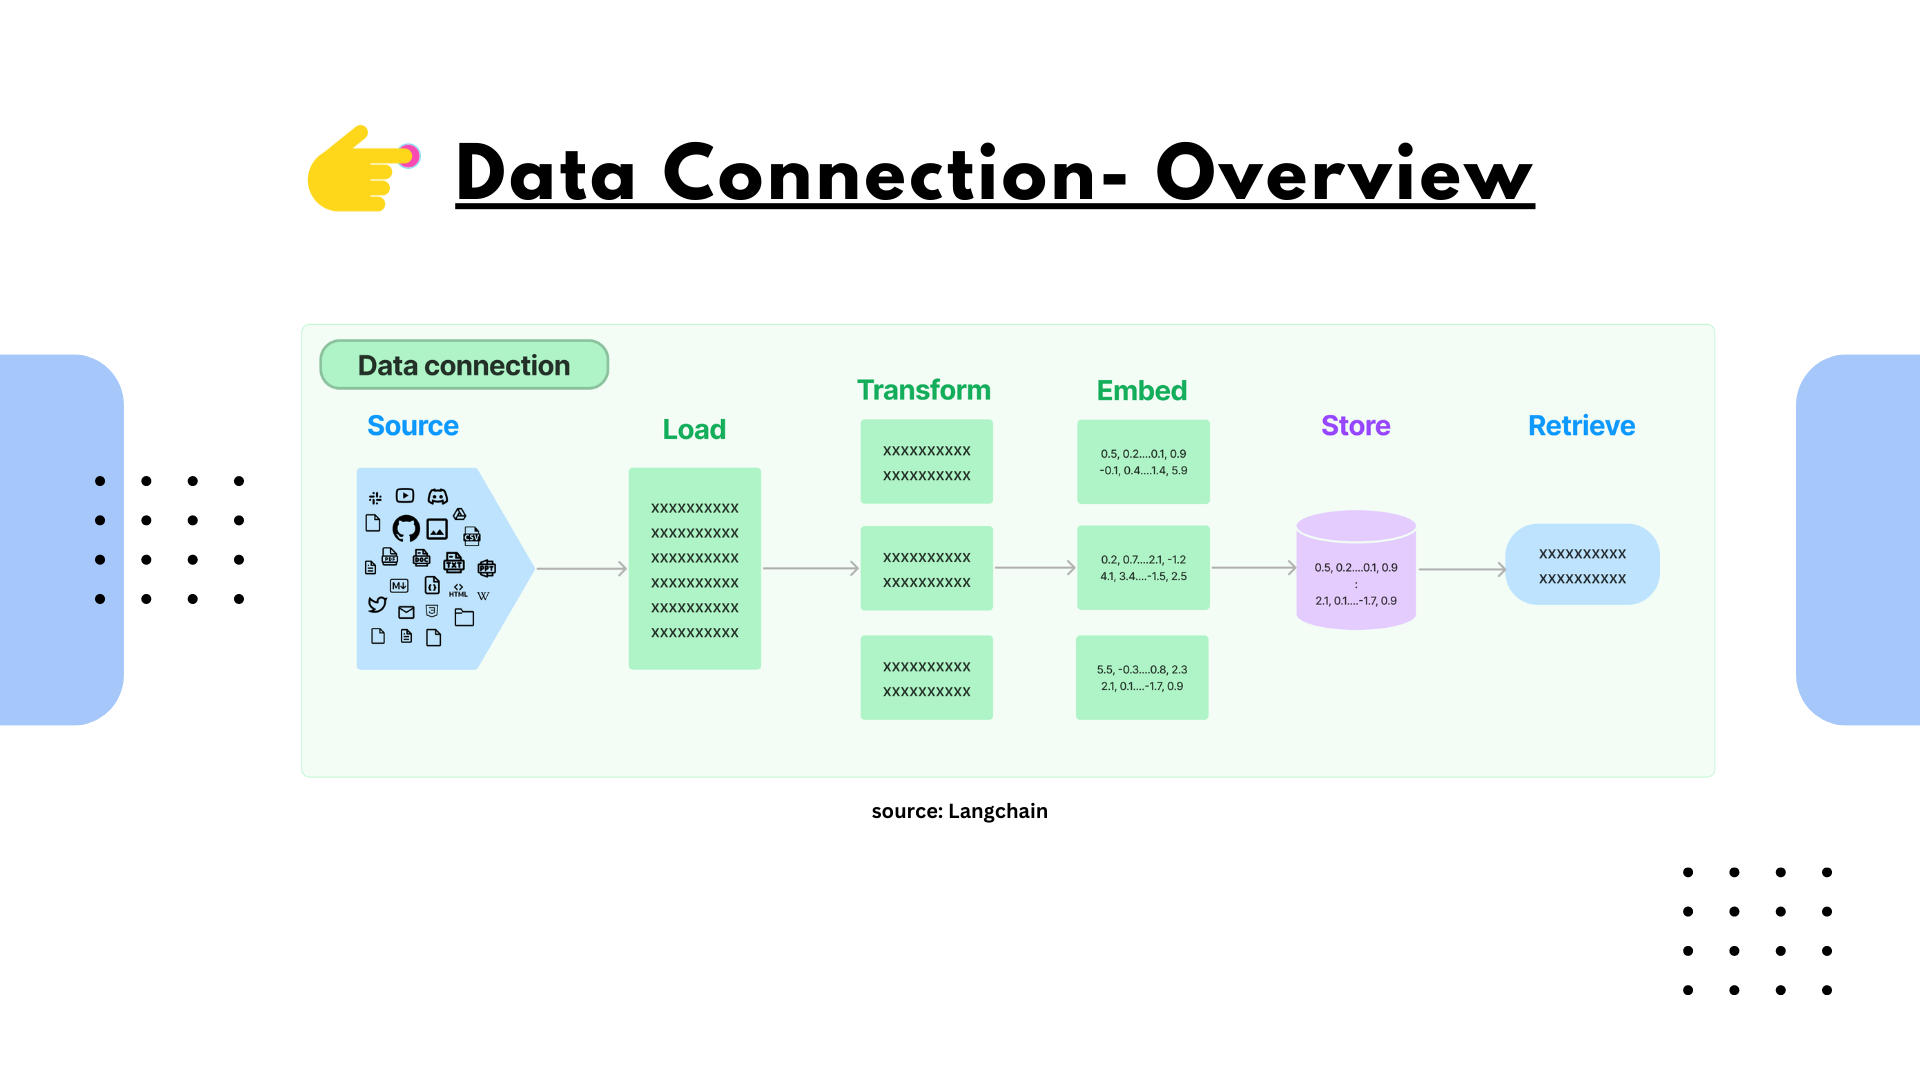

In [27]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings

## Document loaders
#### Load documents from many different sources

In [29]:
loader = TextLoader('Sample.txt')
documents = loader.load()

In [30]:
len(documents)

1

## Document transformers
#### Split document and drop redundant documents

In [31]:
text_splitter = CharacterTextSplitter (chunk_size=200,
chunk_overlap=0)

texts= text_splitter.split_documents(documents)

Created a chunk of size 486, which is longer than the specified 200
Created a chunk of size 426, which is longer than the specified 200
Created a chunk of size 419, which is longer than the specified 200
Created a chunk of size 498, which is longer than the specified 200
Created a chunk of size 319, which is longer than the specified 200
Created a chunk of size 436, which is longer than the specified 200
Created a chunk of size 309, which is longer than the specified 200
Created a chunk of size 365, which is longer than the specified 200
Created a chunk of size 288, which is longer than the specified 200
Created a chunk of size 320, which is longer than the specified 200
Created a chunk of size 354, which is longer than the specified 200
Created a chunk of size 263, which is longer than the specified 200
Created a chunk of size 339, which is longer than the specified 200
Created a chunk of size 338, which is longer than the specified 200
Created a chunk of size 366, which is longer tha

In [32]:
len(texts)

19

In [33]:
texts

[Document(page_content='India, officially known as the Republic of India, is a diverse and vibrant country located in South Asia. With a rich history spanning thousands of years, India is known for its cultural heritage, religious diversity, and vast landscapes. From the majestic Himalayas in the north to the serene backwaters of Kerala in the south, India encompasses a wide range of geographical features, including deserts, plains, mountains, and coastlines, making it a land of incredible natural beauty.', metadata={'source': 'Sample.txt'}),
 Document(page_content='India is the seventh-largest country by land area and the second-most populous country in the world, with a population exceeding 1.3 billion people. It is a federal parliamentary democratic republic, with a president as the head of state and a prime minister as the head of government. The country follows a multi-tiered administrative structure, with 28 states and 9 union territories, each having its own elected government.'

## Text embedding models
#### Take unstructured text and turn it into a list of floating point numbers

<font color='green'>
A sentence-transformers model is designed to transform sentences and paragraphs into a high-dimensional vector space of 384 dimensions. This model is particularly useful for tasks such as clustering or semantic search, where the vector representations can be employed to measure similarity and perform efficient retrieval operations.
<font>

In [36]:
import os
from dotenv import load_dotenv
load_dotenv()
os.getenv('OPENAI_API_KEY')
embeddings=OpenAIEmbeddings()

In [41]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

## Vector stores
#### Store and search over embedded data

<font color='green'>
An AI-native open-source embedding database, designed to make it easy to build LLM apps by making knowledge, facts, and skills pluggable for LLMs. It is free to use under an Apache 2.0 license.
<font>

#### Load Embeddings of Text into Chroma

In [40]:
db = Chroma.from_documents(texts, embeddings)

#### Let's have a look at embeddings - Numeric representation

In [42]:
db._collection.get(include=['embeddings'])

{'ids': ['e0d6097c-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60a58-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60a76-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60a8a-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60a9e-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60ab2-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60ac6-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60aee-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b0c-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b20-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b34-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b3e-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b52-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b66-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b7a-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60b8e-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60ba2-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60bb6-6cc0-11ee-9b72-62e1dafddbed',
  'e0d60bc0-6cc0-11ee-9b72-62e1dafddbed',
  '8675c5f8-6d47-11ee-9b72-62e1dafddbed',
  '8675c698-6d47-11ee-9b72-62e1dafddbed',
  '8675c6b6-6d47-11ee-9b72-62e1dafddbed',
  '8675c6d4-6d47-11ee-9b72-62e1dafddbed',
  '8675c6e8-6d47-11ee-9b72-

## Retrievers
#### Query your data

<font color='green'>
A vector store retriever is a retrieval system that utilizes a vector store to fetch documents. It acts as a simplified interface to the Vector Store class, adapting it to adhere to the Retriever interface. By leveraging the search functionalities provided by the vector store, such as similarity search and Maximal Marginal Relevance (MMR), the vector store retriever conducts queries on the text data contained within the vector store.
<font>

<font color='green'>
You can also specify 'search kwargs' value k as 1,2,3 ..... to use when doing retrieval.
<font>

In [46]:
retriever = db.as_retriever(search_kwargs={"k": 2})

In [47]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain.vectorstores.chroma.Chroma object at 0x136f95550>, search_kwargs={'k': 2})

## Question 1

<font color='green'>
'get_relevant_documents' function gives out the relevant documnets list, based on your choice you can proceed further
<font>

In [48]:
docs = retriever.get_relevant_documents("What is the capital of india?")

In [49]:
docs

[Document(page_content='Delhi is the capital of India', metadata={'source': 'Sample.txt'}),
 Document(page_content='Delhi is the capital of India', metadata={'source': 'Sample.txt'})]

## Question 2

In [50]:
docs = retriever.get_relevant_documents("What is the currency india?")

In [51]:
docs

[Document(page_content='The Indian rupee is the official currency in the Republic of India. The rupee is subdivided into 100 paise. The issuance of the currency is controlled by the Reserve Bank of India.', metadata={'source': 'Sample.txt'}),
 Document(page_content='The Indian rupee is the official currency in the Republic of India. The rupee is subdivided into 100 paise. The issuance of the currency is controlled by the Reserve Bank of India.', metadata={'source': 'Sample.txt'})]